In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anshtanwar/pets-facial-expression-dataset")

print("Path to dataset files:", path)

100%|██████████| 38.6M/38.6M [00:01<00:00, 25.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/anshtanwar/pets-facial-expression-dataset/versions/11


In [5]:
import os

train_dir = os.path.join(path, "Master Folder", "train")
val_dir = os.path.join(path, "Master Folder", "valid")
test_dir = os.path.join(path, "Master Folder", "test")


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()


model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(4, activation='softmax'))  # Custom output classes


model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))



model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,917,124 (503.22 MB)

 Trainable params: 131,917,124 (503.22 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 1000 images belonging to 4 classes.
Found 36 images belonging to 4 classes.


In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)


reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=4,
    min_lr=1e-6,
    verbose=1
)

model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2438 - loss: 1.3865
Epoch 1: val_accuracy improved from -inf to 0.16667, saving model to best_model.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.2434 - loss: 1.3865 - val_accuracy: 0.1667 - val_loss: 1.3867
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.2424 - loss: 1.3861
Epoch 2: val_accuracy improved from 0.16667 to 0.30556, saving model to best_model.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.2421 - loss: 1.3861 - val_accuracy: 0.3056 - val_loss: 1.3850
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.2363 - loss: 1.3861
Epoch 3: val_accuracy did not improve from 0.30556
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 571ms/step - accuracy: 0.2366 - loss: 1.3861 - val_accuracy: 0.3056 - val_loss: 1.3856
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.2595 - loss: 1.3861
Epoch 4: val_accuracy did not improve from 0.30556
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 554ms/step - accuracy: 0.2592 - loss: 1.3861 - val_accuracy: 0.3056 - val_loss: 1.3855
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.2490 - loss: 1.3862
Epoch 5: val_accuracy did not improve from 0.30556
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 556ms/step - accuracy: 0.2490 - loss: 1.3862 - val_accuracy: 0.3056 - val_loss: 1.3845
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.2655 - loss: 1.3848
Epoch 6: val_accuracy did not impr

32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.2885 - loss: 1.3796 - val_accuracy: 0.3889 - val_loss: 1.3546
Epoch 20/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.2793 - loss: 1.3719
Epoch 20: val_accuracy did not improve from 0.38889
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 564ms/step - accuracy: 0.2798 - loss: 1.3719 - val_accuracy: 0.2778 - val_loss: 1.3660
Epoch 21/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.3028 - loss: 1.3659
Epoch 21: val_accuracy did not improve from 0.38889
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 552ms/step - accuracy: 0.3028 - loss: 1.3659 - val_accuracy: 0.3611 - val_loss: 1.3340
Epoch 22/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.3264 - loss: 1.3565
Epoch 22: val_accuracy did not improve from 0.38889
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 557ms/step - accuracy: 0.3262 - loss: 1.3566 - val_accuracy: 0.3611 - val_loss: 1.3255
Epoch 23/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.3523 - loss: 1.3472
Epoch 23: val_accuracy did 

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

model.evaluate(test_generator)


Found 38 images belonging to 4 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3664 - loss: 1.3262


[1.3405163288116455, 0.34210526943206787]

In [12]:
import numpy as np

# Get predictions
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
target_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


Accuracy: 0.3421
Classification Report:
              precision    recall  f1-score   support

       Angry       0.47      0.70      0.56        10
       Other       0.11      0.17      0.13         6
         Sad       0.00      0.00      0.00        11
       happy       0.56      0.45      0.50        11

    accuracy                           0.34        38
   macro avg       0.28      0.33      0.30        38
weighted avg       0.30      0.34      0.31        38

Confusion Matrix:
[[7 1 1 1]
 [2 1 2 1]
 [3 6 0 2]
 [3 1 2 5]]


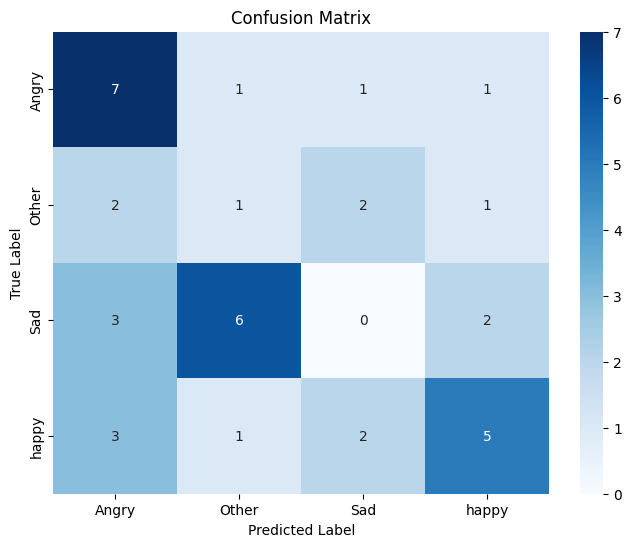

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
